# **Project Name**   Machine Learning Project on Bike Rent Demand

##### **Project Type**    - Regression
Pranali Yadav


# **Project Summary -**

Bike Seoul is a bike sharing service in the city of Seoul. It is part of the city's efforts to promote sustainable transportation and reduce traffic congestion. The service allows residents and visitors to rent bicycles at various stations across the city and return them to any other station, providing a convenient and eco-friendly mode of transportation.
In recent years, the demand for bike rentals in Seoul has increased, leading to the need for a more efficient and effective way to manage the bike sharing operations. Accurately predicting bike demand is crucial for optimizing fleet management, ensuring the availability of bikes at high-demand locations, and reducing waste and costs.

The main objective of this project is to develop a machine learning model that can accurately predict the demand for bike rentals in Seoul, South Korea, based on historical data and various relevant factors such as weather conditions, time of day, and public holidays.
In this project we have used regression analysis techniques to model the bike demand data. The model trained on a large dataset of past bike rental information, along with relevant weather and time data. The model  then be tested and evaluated using metrics such as mean squared error and r-squared values.
The actual data is from the Seoul city government's open data portal, and this dataset is also available on Kaggle.

So, our main goal was to achieve an accuracy of at least 85% in the bike demand predictions, which would help the city's bike sharing service providers plan their fleet operations more effectively and respond to demand changes in real-time.
We have performed lots of regression algorithms like linear regression, random forest, decision tree, gradient boosting , Xtreme gradient boosting, also we tried to do hyperparameter tuning and cross validation to improve the accuracy of the model. And finally we have decided to select Xtreme gradient boosting algorithm because it gave us high accuracy around 93% and 90% on train and test data respectively.

This project not only provided valuable insights into bike demand patterns in Seoul but also demonstrated the practical applications of machine learning in addressing real-world problems. The findings could potentially be extended to other cities with similar bike sharing systems, leading to improved services for bike users and more sustainable transportation systems.

# **Problem Statement**

Currently Rental bikes are introduced in many urban cities. The business problem is to ensure a stable supply of rental bikes in urban cities by predicting the demand for bikes at each hour. By providing a stable supply of rental bikes, the system can enhance mobility comfort for the public and reduce waiting time, leading to greater customer satisfaction.

To address this problem, i need to develop a predictive model that takes into account various factors that may influence demand, such as time of day, seasonality, weather conditions, and holidays. By accurately predicting demand, the bike sharing system operators can ensure that there is an adequate supply of bikes available at all times, which can improve the user experience and increase usage of the bike sharing system. This can have a positive impact on the sustainability of urban transportation, as it can reduce congestion, air pollution, and greenhouse gas emissions.

In [5]:
# Import Libraries
import numpy as np
import pandas as pd

In [6]:

from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
#from xgboost import XGBRFRegressor

import warnings
warnings.filterwarnings('ignore')


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10804\2533403659.py:1: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  from numpy import math


### Dataset Loading

In [7]:
df = pd.read_csv('c:\\Users\\ADMIN\\Downloads\\SeoulBikeData.csv',header=0, encoding= 'unicode_escape')


### Dataset Information

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [9]:
# Dataset Describe (all columns included)
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


### Dataset First View

In [10]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


### Dataset Rows & Columns count

In [11]:
# Dataset Rows & Columns count
# Checking number of rows and columns of the dataset using shape
print("Number of rows are: ",df.shape[0])
print("Number of columns are: ",df.shape[1])

Number of rows are:  8760
Number of columns are:  14


#### Missing Values/Null Values

In [12]:
# Checking Missing Values/Null Values Count
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [13]:
df.value_counts(normalize=True, sort=True, dropna=True, ascending=False)

Date        Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  Seasons  Holiday     Functioning Day
01/01/2018  61                 5     -4.4             54           0.8               1786              -12.3                      0.00                     0.0           0.0            Winter   Holiday     Yes                0.000114
21/04/2018  707                0      16.3            59           0.2               756                8.2                       0.00                     0.0           0.0            Spring   No Holiday  Yes                0.000114
            324                7      12.5            68           1.1               457                6.7                       0.22                     0.0           0.0            Spring   No Holiday  Yes                0.000114
            436                2      14.7            63           1.8          

In [15]:
df["Date"] = pd.to_datetime(df["Date"],dayfirst=True)
df.Date.head()

0   2017-12-01
1   2017-12-01
2   2017-12-01
3   2017-12-01
4   2017-12-01
Name: Date, dtype: datetime64[ns]

 #**Data Visualization**

In [22]:
df.corr(numeric_only=True)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
Rented Bike Count,1.000000,0.410257,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804
Hour,0.410257,1.000000,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516
Temperature(°C),0.538558,0.124114,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405
Humidity(%),-0.199780,-0.241644,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183
Wind speed (m/s),0.121108,0.285197,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554
Visibility (10m),0.199280,0.098753,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695
Dew point temperature(°C),0.379788,0.003054,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887
Solar Radiation (MJ/m2),0.261837,0.145131,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301
Rainfall(mm),-0.123074,0.008715,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500
Snowfall (cm),-0.141804,-0.021516,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000


<Axes: >

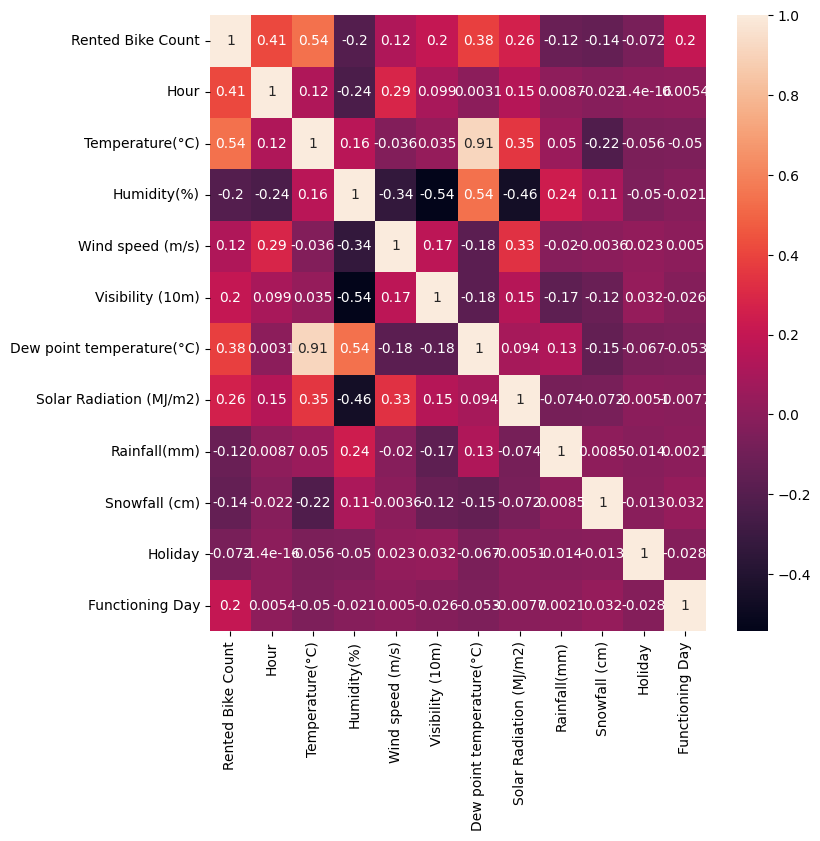

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True)

Only Temperature and Hour has considerable correlation wit our arget variable 'Rented Bike Count'
There is correlation between Temperature and Dew point Temperature(°C)

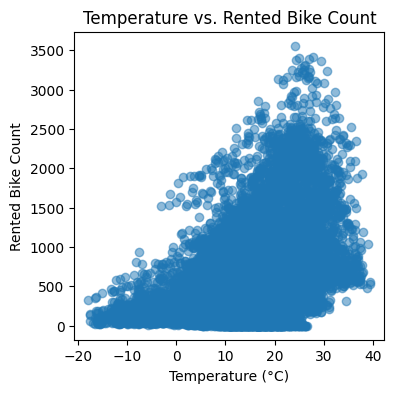

In [85]:
temperature = df['Temperature(°C)']
rented_bike_count = df['Rented Bike Count']

# Plot the scatter plot
plt.figure(figsize=(4, 4))
plt.scatter(temperature, rented_bike_count, alpha=0.5)
plt.title('Temperature vs. Rented Bike Count')
plt.xlabel('Temperature (°C)')
plt.ylabel('Rented Bike Count')
plt.show()


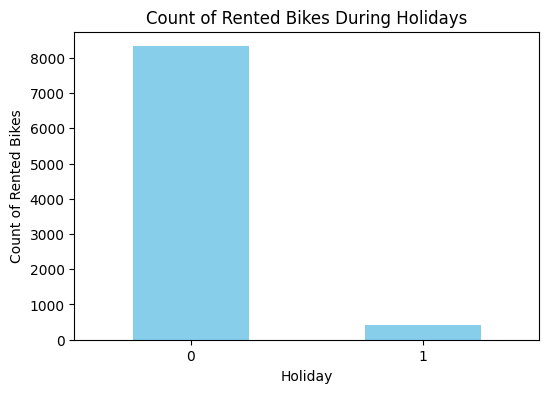

In [82]:
holiday_counts = df['Holiday'].value_counts()

# Plot the bar graph
plt.figure(figsize=(6, 4))
holiday_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Rented Bikes During Holidays')
plt.xlabel('Holiday')
plt.ylabel('Count of Rented Bikes')
plt.xticks(rotation=0)
plt.show()


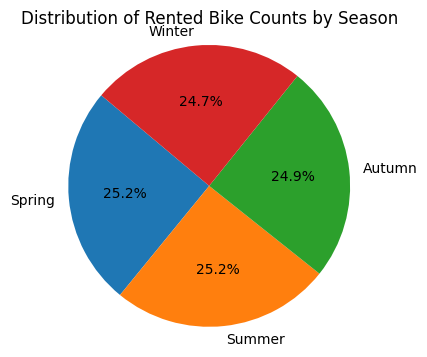

In [84]:
season_counts = df['Seasons'].value_counts()

# Plot the pie chart
plt.figure(figsize=(4, 4))
plt.pie(season_counts, labels=season_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Rented Bike Counts by Season')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


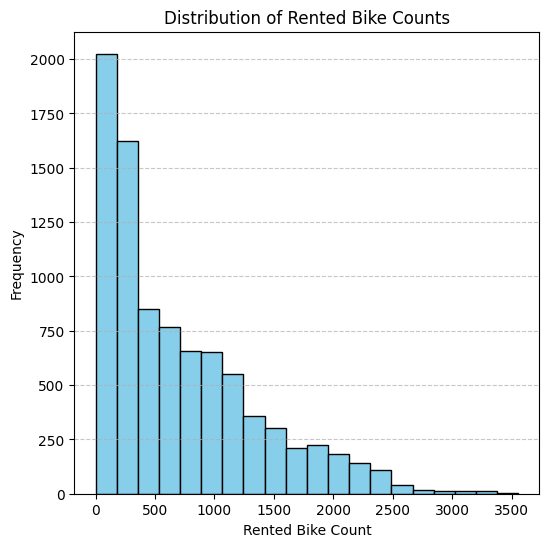

In [89]:
rented_bike_counts = df['Rented Bike Count']

# Plot the histogram
plt.figure(figsize=(6, 6))
plt.hist(rented_bike_counts, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Rented Bike Counts')
plt.xlabel('Rented Bike Count')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Converting categorical data into machine redable data

In [16]:

new_df = df.copy()

In [17]:
new_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


We have dichotomous in Holiday and Functioning Day we can convert them into 0 nad 1

In [18]:
df['Holiday'] = df['Holiday'].replace('No Holiday',0)
df['Holiday'] = df['Holiday'].replace('Holiday',1)

In [19]:
df['Functioning Day'] = df['Functioning Day'].replace('No',0)
df['Functioning Day'] = df['Functioning Day'].replace('Yes',1)

For Seasons we can use one hot key encoding as we have nominal data in this feature

In [20]:
categorical_columns2 = new_df.select_dtypes(['object'])

In [21]:
encoded = pd.get_dummies(categorical_columns2, dtype='int64')

In [30]:
encoded.head()

,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday,Functioning Day_No,Functioning Day_Yes
0,0,0,0,1,0,1,0,1
1,0,0,0,1,0,1,0,1
2,0,0,0,1,0,1,0,1
3,0,0,0,1,0,1,0,1
4,0,0,0,1,0,1,0,1


Dropping unnecessary coulumns
• dropping categorical data which has been converted into numerical data
• dropping date
• Dew point temperature(°C) because its correlated with Temperature(°C) we can keep only one

In [22]:
new_df.drop(categorical_columns2,axis=1,inplace=True)

Let's concatenate our encoded dataframe with datframe that has only numerical columns

In [23]:
new_df = pd.concat([new_df,encoded],axis = 1)

In [24]:
new_df.drop('Date', axis=1, inplace=True)

In [25]:
new_df.drop('Dew point temperature(°C)', axis=1, inplace=True)


 Data Splitting
 Now our dataset is ready for modelling.

In [26]:
X = new_df.drop(columns='Rented Bike Count')
y = new_df['Rented Bike Count']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [37]:
print(f'The shapes of train and test set for independent variables are: X_train={X_train.shape}, X_test={X_test.shape}')
print(f'The shapes of train and test set for dependent variables are: y_train={y_train.shape}, y_test={y_test.shape}')

The shapes of train and test set for independent variables are: X_train=(7008, 16), X_test=(1752, 16)
The shapes of train and test set for dependent variables are: y_train=(7008,), y_test=(1752,)


In [28]:
X_train.values

array([[15. ,  8.2, 62. , ...,  1. ,  0. ,  1. ],
       [18. , 28.4, 57. , ...,  1. ,  0. ,  1. ],
       [11. , 29.9, 57. , ...,  1. ,  0. ,  1. ],
       ...,
       [11. , 25.5, 57. , ...,  1. ,  0. ,  1. ],
       [ 0. ,  8.3, 59. , ...,  1. ,  0. ,  1. ],
       [20. ,  7.1, 83. , ...,  1. ,  0. ,  1. ]])

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error,r2_score,accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
#from xgboost import XGBRFRegressor

import warnings
warnings.filterwarnings('ignore')

 Data Scaling

In [31]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [32]:
#after transformation
X_train

array([[ 0.50774916, -0.38874606,  0.18996015, ...,  0.23202281,
        -0.18254726,  0.18254726],
       [ 0.9408263 ,  1.29850393, -0.05608294, ...,  0.23202281,
        -0.18254726,  0.18254726],
       [-0.06968702,  1.42379477, -0.05608294, ...,  0.23202281,
        -0.18254726,  0.18254726],
       ...,
       [-0.06968702,  1.05627497, -0.05608294, ...,  0.23202281,
        -0.18254726,  0.18254726],
       [-1.65763652, -0.38039334,  0.0423343 , ...,  0.23202281,
        -0.18254726,  0.18254726],
       [ 1.22954439, -0.48062601,  1.22334111, ...,  0.23202281,
        -0.18254726,  0.18254726]])

 ***ML Model Implementation***

#**Decision tree regressor**

In [33]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [34]:
reg = DecisionTreeRegressor(criterion='squared_error', max_leaf_nodes=25, random_state=0)
reg.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=25, random_state=0)

In [35]:
y_predicted = reg.predict(X_test)
y_train_prediction = reg.predict(X_train)

In [36]:
# test results
print(mean_squared_error(y_test, y_predicted))
print(r2_score(y_test, y_predicted))
print(mean_absolute_error(y_test, y_predicted))
print(root_mean_squared_error(y_test, y_predicted))

106123.70920344388
0.7464325412031669
219.78681996507268
325.7663414219521


In [37]:
# test results
print(mean_squared_error(y_train, y_train_prediction))
print(r2_score(y_train, y_train_prediction))
print(mean_absolute_error(y_train, y_train_prediction))
print(root_mean_squared_error(y_train, y_train_prediction))

96596.14855320382
0.7673744199148671
211.18037322540002
310.7992093831704


Let's store metric values of train and test set for later comparisons.

CROSS VALIDATION 

In [38]:
param_dict = {"criterion":['squared_error', 'absolute_error'],
              "max_depth":[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,21,22,23,24]}

In [39]:
grid = GridSearchCV(reg,param_grid=param_dict,cv=10,n_jobs=-1)

In [40]:


grid.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=DecisionTreeRegressor(max_leaf_nodes=25, random_state=0),
             n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 21, 22, 23,
                                       24]})

In [41]:
grid.best_estimator_

DecisionTreeRegressor(criterion='absolute_error', max_depth=11,
                      max_leaf_nodes=25, random_state=0)

In [42]:
grid.best_params_

{'criterion': 'absolute_error', 'max_depth': 11}

In [43]:
grid.best_score_

0.7502315477044867

In [44]:
dt_model_tunned = grid.best_estimator_

In [45]:
y_train_prediction2 =dt_model_tunned.predict(X_train)
y_predicted2 =dt_model_tunned.predict(X_test)

In [46]:
# train results
print(mean_squared_error(y_train, y_train_prediction2))
print(r2_score(y_train, y_train_prediction2))
print( mean_absolute_error(y_train, y_train_prediction2))
print( root_mean_squared_error(y_train, y_train_prediction2))

103383.40218321918
0.7510291635406172
205.53852739726028
321.5328944030753


In [47]:
# test results

print(mean_squared_error(y_test, y_predicted2))
print(r2_score(y_test, y_predicted2))
print(mean_absolute_error(y_test, y_predicted2))
print( root_mean_squared_error(y_test, y_predicted2))

108667.37428652968
0.7403548164799213
207.33533105022832
329.6473483687222


#**RANDOM REGRESSOR**

In [48]:
reg = RandomForestRegressor(criterion='squared_error', max_leaf_nodes=25, random_state=0)
reg.fit(X_train, y_train)

RandomForestRegressor(max_leaf_nodes=25, random_state=0)

In [49]:
y_predicted1 = reg.predict(X_test)
y_train_prediction1 = reg.predict(X_train)

In [50]:
#TEST RESULT
print(mean_squared_error(y_test, y_predicted1))
print(r2_score(y_test, y_predicted1))
print(mean_absolute_error(y_test, y_predicted1))
print(root_mean_squared_error(y_test, y_predicted1))

85796.80872060338
0.795000769164075
199.7319376231824
292.9109228427704


In [51]:
#TRAIN RESULT
print(mean_squared_error(y_train, y_train_prediction1))
print(r2_score(y_train, y_train_prediction1))
print(mean_absolute_error(y_train, y_train_prediction1))
print(root_mean_squared_error(y_train, y_train_prediction1))

77600.7997196457
0.8131195568329513
191.77284840191143
278.56920095309476


• From evaluation metrics result we can conclude our model is overfitting
• We need to do hyperparameter tunning to prevent overfitting
Cross-validation using GridSearch

In [52]:
# Setting the parameters to tune

# Number of trees
n_estimators = list(np.arange(80,200,20,dtype='int64'))

# Maximum depth of trees
max_depth = list(np.arange(12,30,2,dtype='int64'))

# HYperparameter Grid
param_dict1 = {'n_estimators' : n_estimators,
              'max_depth' : max_depth}

In [53]:
rf_random = GridSearchCV(estimator=reg,param_grid= param_dict1,cv = 5,n_jobs=-1)
rf_random.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_leaf_nodes=25, random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [12, 14, 16, 18, 20, 22, 24, 26, 28],
                         'n_estimators': [80, 100, 120, 140, 160, 180]})

In [54]:
rf_random.best_score_

0.7991689153496643

In [55]:
rf_model_tunned = rf_random.best_estimator_



In [56]:
y_train_prediction2 = rf_model_tunned.predict(X_train)
y_predicted2 = rf_model_tunned.predict(X_test)

In [57]:
# train results

print( mean_squared_error(y_train, y_train_prediction2))
print(r2_score(y_train, y_train_prediction2))
print( mean_absolute_error(y_train, y_train_prediction2))
print(root_mean_squared_error(y_train, y_train_prediction2))

77109.84039903947
0.8143018989704468
191.29197361101134
277.686586638677


In [58]:
# test results
print( mean_squared_error(y_test, y_predicted2))
print(r2_score(y_test, y_predicted2))
print( mean_absolute_error(y_test, y_predicted2))
print( root_mean_squared_error(y_test, y_predicted2))

85144.54841046767
0.7965592520945772
199.32218974995013
291.79538791843106


#***XGBOOST REGRESSOR**

In [59]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [60]:
from xgboost import XGBRFRegressor


In [61]:
xgb_model=XGBRFRegressor(random_state=0,n_jobs=-1)
xgb_model.fit(X_train,y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=-1,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=0, reg_alpha=None, ...)

In [62]:
y_predicted2 = reg.predict(X_test)
y_train_prediction2 = reg.predict(X_train)

In [63]:
print(mean_squared_error(y_test, y_predicted2))
print(r2_score(y_test, y_predicted2))
print(mean_absolute_error(y_test, y_predicted2))
print(root_mean_squared_error(y_test, y_predicted2))

85796.80872060338
0.795000769164075
199.7319376231824
292.9109228427704


In [64]:
print(mean_squared_error(y_train, y_train_prediction2))
print(r2_score(y_train, y_train_prediction2))
print(mean_absolute_error(y_train, y_train_prediction2))
print(root_mean_squared_error(y_train, y_train_prediction2))

77600.7997196457
0.8131195568329513
191.77284840191143
278.56920095309476


 From evaluation metrics result we can conclude our model is underfitting
• We need to do hyperparameter tunning to prevent underfitting
Cross-validation using GridSearch

In [65]:
# Number of trees
n_estimators = list(np.arange(5,15,2,dtype='int64'))

# Maximum depth of trees
max_depth = list(np.arange(10,20,1,dtype='int64'))

# learning rate
learning_rate=list(np.arange(0.05,0.15,0.01))

# gamma
gamma=list(np.linspace(10,20,num=20))

# subsamples
subsample=[0.3,0.5,0.6] 

# HYperparameter Grid
param_dict1 = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
               'gamma':gamma,
               'subsample':subsample,
               'learning_rate':learning_rate}

In [66]:
xgb_random = RandomizedSearchCV(estimator=xgb_model,param_distributions = param_dict1,cv = 5,n_jobs=-1,random_state=12)
xgb_random.fit(X_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRFRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            max_bin=None,
                                            max_cat_threshold=Non...
                                                  17.36842105263158,
                                                  17.894736842105264,
                                                  18.421052631578945,
                                                  18.94736842105263,
                                                  19.473684210526315, 20.0],
                                        'learning_rate': [0.05,
                                                          0.060000000000000005,
                                                          0.07,
                                                          0.08000000000000002,
                                                          0.09000000000000001,
                                                          0.1,
                                                          0.11000000000000001,
                                                          0.12000000000000001,
                                                          0.13, 0.14],
                                        'max_depth': [10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19],
                                        'n_estimators': [5, 7, 9, 11, 13],
                                        'subsample': [0.3, 0.5, 0.6]},
                   random_state=12)

In [67]:
xgb_random.best_estimator_

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=12.105263157894736,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.14, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=13, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=13, n_jobs=-1,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=0, ...)

In [68]:
xgb_random.best_score_

0.22151846133825778

In [69]:
xgb_model_tunned = xgb_random.best_estimator_

In [72]:
y_train_prediction2 = xgb_model_tunned.predict(X_train)
y_predicted2 = xgb_model_tunned.predict(X_test) 

In [75]:
# train results

print( mean_squared_error(y_train, y_train_prediction2))
print(r2_score(y_train, y_train_prediction2))
print( mean_absolute_error(y_train, y_train_prediction2))
print( root_mean_squared_error(y_train, y_train_prediction2))

315844.0674950709
0.23937537347029325
451.8844554500493
562.0000600489923


In [76]:
# test results

print( mean_squared_error(y_test, y_predicted2))
print(r2_score(y_test, y_predicted2))
print( mean_absolute_error(y_test, y_predicted2))
print(root_mean_squared_error(y_test, y_predicted2))

324480.7585626313
0.22469953232161322
458.67157449243274
569.6321256413048


Conclusion

After having experimented two machine learning algorithms namely; Decision Tree, Random forest and Xgboost, we can say that the best
performance is given by Random Fprest model with r2_score of 0.81 and 0.79 for training and test set respectively using RandomSearch.
The best hyperparameter values are:


We have come to an end of our long exercise. Throughout the analysis we went through various steps to determine our
predictions for bike rent demand. We started with simple EDA where we analysed our dependent variable as well as other
independent variables. We found out the correlation, count, relationships with the dependent variable. We looked for missing
values and outliers and did some feature modifications.

Finally we implemented 3 machine learning algorithms namely; DecisionTree, RandomForest and XGBoost. We tried
hyperparameter tuning to reduce overfitting and increase model performance. The best performance was given by our
RandomForest model.

The r2_score of our best model was 0.81 and 0.79 for training and test set respectively. Performance can be improved even
further by applying fine tunings and gathering more amount of observations so that the models can identify more patterns and
become less prone to overfitting. With evolution of new technology, these numbers can change in future hence there will
always be a need to check on the model from time to time. I hope this exercise will help you to take a step forward!